In [1]:
import ROOT
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#Input the datasets
data_h_rest = pd.read_csv('OUTPUT_Za_Propagator_DATA_particle_momentum_data.csv')
data_Z_rest = pd.read_csv('OUTPUT_Zrest_ZaProp.csv')

$$\textbf{Get the Z boson momentum (Higgs Rest Frame)}$$

In [3]:
# Initialize a list to store the Z boson momentum vectors
z_boson_momenta = []
data = data_h_rest
# Loop through the data to extract Z boson momenta
for i in range(len(data_h_rest)):
    # Check if the current particle is a Z Boson
    if data.iloc[i, 1] == 'Z Boson':
        # Extract momentum components (Px, Py, Pz)
        px = data.iloc[i, 2]
        py = data.iloc[i, 3]
        pz = data.iloc[i, 4]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Append the momentum vector to the list
        z_boson_momenta.append(momentum_vector)

# Convert the list of Z boson momenta to a DataFrame for easier handling
z_boson_momenta_df = pd.DataFrame(z_boson_momenta, columns=['Px', 'Py', 'Pz'])

# Print the momentum vectors for Z boson (event by event)
print("Z Boson Momentum Vectors (Event by Event):")
print(z_boson_momenta_df)

# Optionally, save the momentum vectors to a new CSV file
z_boson_momenta_df.to_csv('z(ZaProp)_boson_momenta.csv', index=True)


Z Boson Momentum Vectors (Event by Event):
             Px         Py         Pz
0    -29.692621   5.010355  -7.983410
1    -17.900806  11.154505  10.793622
2     15.593260  22.603571  12.157278
3    -26.695337  28.616102  -9.238236
4      2.326849 -18.907558  23.988398
...         ...        ...        ...
4316 -13.797826  26.096167   2.234127
4317  33.300995  -3.752310   3.203446
4318  25.043968  11.653101   7.296015
4319 -22.930294 -16.401117  -6.050340
4320  23.087269  -6.435698  18.308907

[4321 rows x 3 columns]


$$\textbf{Get the ELECTRON momentum (Z Rest Frame)}$$

In [4]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZaProp.csv')

# Initialize a list to store the momentum vectors of Electron+ and Electron- for each event
electron_momenta = []

# Loop through the data to extract momentum for Electron+ and Electron-
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is Electron+ or Electron-
    if particle == 'Electron-':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        electron_momenta.append([event_number, *momentum_vector])

# Convert the list of electron momenta to a DataFrame for easier handling
electron_momenta_df = pd.DataFrame(electron_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the electrons
print("Momentum Vectors for Electron- (Event by Event):")
print(electron_momenta_df)

# Optionally, save the electron momentum vectors to a new CSV file
electron_momenta_df.to_csv('electron(ZaProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Electron- (Event by Event):
      Event         Px         Py         Pz
0         3  15.229485   6.628036  41.028512
1        23  -9.141696 -26.626938  34.628761
2        83 -25.807964  30.279164  17.490800
3        88 -39.948643 -24.301255   3.623812
4        93   4.887444 -22.339821  16.636519
...     ...        ...        ...        ...
2194  21583  40.295370 -11.344757  17.424011
2195  21588  -0.424602  -1.510689 -42.423538
2196  21593  -2.321610  38.183494 -25.637388
2197  21598  -3.022055  31.625488 -33.088038
2198  21603   8.192892  15.359991  41.450761

[2199 rows x 4 columns]


$$\textbf{Get the angles between ELECTRON (Z rest frame) \& Z boson (Higgs rest frame) momentum}$$

In [5]:
# Load the CSV files for Z boson and electron data
z_data = pd.read_csv('z(ZaProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
electron_data = pd.read_csv('electron(ZaProp)_momenta_Zrest.csv')  # Replace with the correct path to the electron CSV

# Initialize a list to store the angle between Z boson and electron momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in electron data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    electron_row = electron_data[electron_data['Event'] == event_id]
    
    # If there is corresponding electron data for this event, compute the angle
    if not electron_row.empty:
        # Extract the momentum of electron
        electron_px, electron_py, electron_pz = electron_row.iloc[0, 2], electron_row.iloc[0, 3], electron_row.iloc[0, 4]
        electron_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, electron_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        electron_magnitude = np.linalg.norm(electron_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * electron_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZaProp)_electron_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        3         1.912209
1       23         0.983163
2       83         1.272702
3       88         2.242282
4       93         1.127073
..     ...              ...
429   4288         0.272411
430   4298         3.107466
431   4303         0.516977
432   4308         2.091163
433   4313         0.569808

[434 rows x 2 columns]


$$\textbf{Plot the distribution}$$

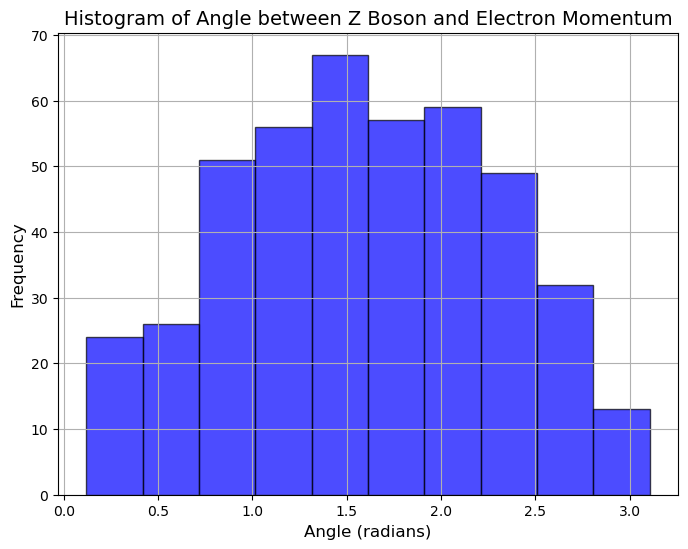

In [6]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZaProp)_electron_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and Electron Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

$$\textbf{Get the momentum of POSITRON (Z Rest Frame)}$$

In [7]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZaProp.csv')

# Initialize a list to store the momentum vectors of Electron+ and Electron- for each event
electron_momenta = []

# Loop through the data to extract momentum for Electron+ and Electron-
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is Electron+ or Electron-
    if particle == 'Electron+':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        electron_momenta.append([event_number, *momentum_vector])

# Convert the list of electron momenta to a DataFrame for easier handling
electron_momenta_df = pd.DataFrame(electron_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the electrons
print("Momentum Vectors for Electron+ (Event by Event):")
print(electron_momenta_df)

# Optionally, save the electron momentum vectors to a new CSV file
electron_momenta_df.to_csv('positron(ZaProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Electron+ (Event by Event):
      Event         Px         Py         Pz
0         2 -15.229484  -6.628037 -41.028511
1        22   9.141696  26.626939 -34.628762
2        82  25.807964 -30.279166 -17.490799
3        87  39.948642  24.301255  -3.623812
4        92  -4.887444  22.339821 -16.636525
...     ...        ...        ...        ...
2194  21582 -40.295369  11.344757 -17.424010
2195  21587   0.424601   1.510689  42.423537
2196  21592   2.321608 -38.183492  25.637387
2197  21597   3.022056 -31.625490  33.088039
2198  21602  -8.192890 -15.359991 -41.450761

[2199 rows x 4 columns]


$$\textbf{Get the angles between POSITRON (Z rest frame) \& Z boson (Higgs rest frame) momentum}$$

In [8]:
import pandas as pd
import numpy as np

# Load the CSV files for Z boson and electron data
z_data = pd.read_csv('z(ZaProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
electron_data = pd.read_csv('positron(ZaProp)_momenta_Zrest.csv')  # Replace with the correct path to the electron CSV

# Initialize a list to store the angle between Z boson and electron momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in electron data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    electron_row = electron_data[electron_data['Event'] == event_id]
    
    # If there is corresponding electron data for this event, compute the angle
    if not electron_row.empty:
        # Extract the momentum of electron
        electron_px, electron_py, electron_pz = electron_row.iloc[0, 2], electron_row.iloc[0, 3], electron_row.iloc[0, 4]
        electron_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, electron_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        electron_magnitude = np.linalg.norm(electron_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * electron_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZaProp)_positron_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        2         2.300435
1       22         0.473952
2       82         2.209370
3       87         1.720432
4       92         1.350606
..     ...              ...
429   4287         1.027523
430   4297         2.131036
431   4302         1.640970
432   4307         2.356315
433   4312         1.597622

[434 rows x 2 columns]


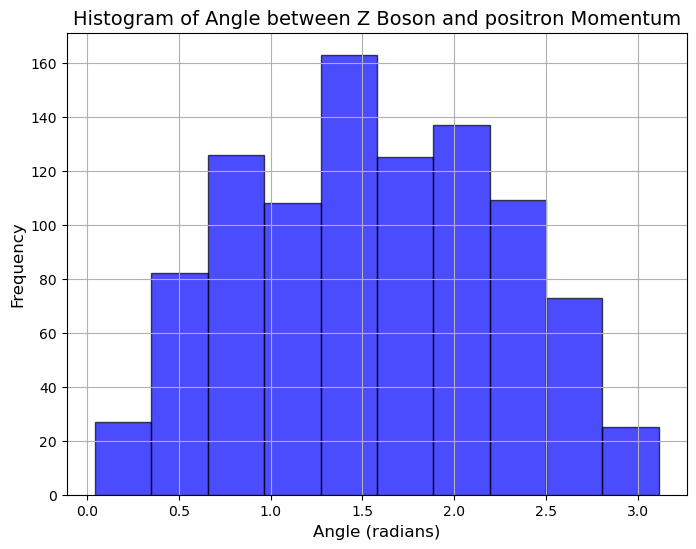

In [9]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZProp)_positron_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and positron Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

$$\textbf{Get the Muon+ momentum (Z Rest Frame)}$$

In [10]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZaProp.csv')

# Initialize a list to store the momentum vectors for each event
muon_momenta = []

# Loop through the data to extract momentum
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is muon+
    if particle == 'Muon+':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        muon_momenta.append([event_number, *momentum_vector])

# Convert the list of muon momenta to a DataFrame for easier handling
muon_momenta_df = pd.DataFrame(muon_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the muons
print("Momentum Vectors for Muon+ (Event by Event):")
print(muon_momenta_df)

# Optionally, save the muon momentum vectors to a new CSV file
muon_momenta_df.to_csv('muonplus(ZaProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Muon+ (Event by Event):
      Event         Px         Py         Pz
0         7   9.173232 -17.008916 -45.298646
1        12  35.431397  25.559159  10.983485
2        17 -10.856528 -31.018664  17.693901
3        27 -35.836233  15.590614  23.774713
4        32 -10.503351  38.787984 -20.076293
...     ...        ...        ...        ...
2117  21542  10.270275  32.269695  30.822926
2118  21552  39.159332   9.829804  36.006111
2119  21557  -7.257464  21.083858  40.552205
2120  21572 -32.092175  14.693316 -25.285279
2121  21577 -24.050381  -9.796304 -37.706594

[2122 rows x 4 columns]


$$\textbf{Get the angles between POSITRON (Z rest frame) \& Z boson (Higgs rest frame) momentum}$$

In [11]:
# Load the CSV files for Z boson and muon data
z_data = pd.read_csv('z(ZaProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
muon_data = pd.read_csv('muonplus(ZaProp)_momenta_Zrest.csv')  # Replace with the correct path to the muon CSV

# Initialize a list to store the angle between Z boson and muon momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in muon data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    muon_row = muon_data[muon_data['Event'] == event_id]
    
    # If there is corresponding muon data for this event, compute the angle
    if not muon_row.empty:
        # Extract the momentum of electron
        muon_px, muon_py, muon_pz = muon_row.iloc[0, 2], muon_row.iloc[0, 3], muon_row.iloc[0, 4]
        muon_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, muon_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        muon_magnitude = np.linalg.norm(muon_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * muon_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZaProp)_muonplus_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        7         0.321043
1       12         0.750847
2       17         0.803629
3       27         0.883930
4       32         2.078386
..     ...              ...
425   4252         1.285786
426   4257         1.464500
427   4272         1.553730
428   4292         1.687793
429   4317         2.294762

[430 rows x 2 columns]


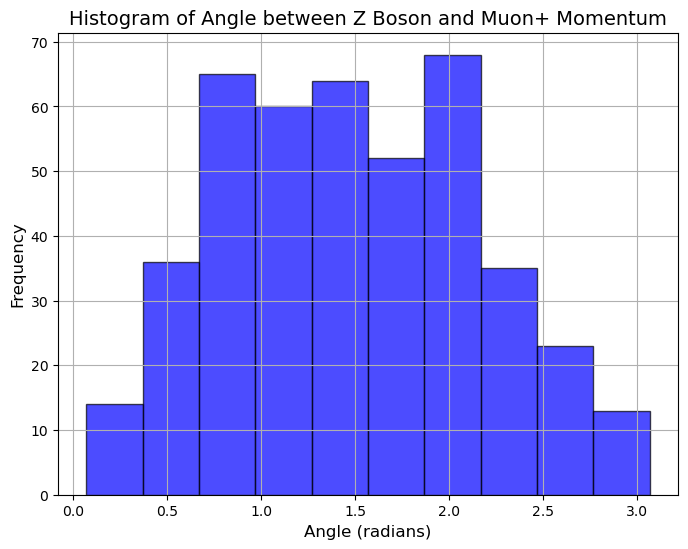

In [12]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZaProp)_muonplus_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and Muon+ Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

$$\textbf{Get the Muon- momentum (Z Rest Frame)}$$

In [13]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZaProp.csv')

# Initialize a list to store the momentum vectors for each event
muon_momenta = []

# Loop through the data to extract momentum
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is muon+
    if particle == 'Muon-':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        muon_momenta.append([event_number, *momentum_vector])

# Convert the list of muon momenta to a DataFrame for easier handling
muon_momenta_df = pd.DataFrame(muon_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the muons
print("Momentum Vectors for Muon+ (Event by Event):")
print(muon_momenta_df)

# Optionally, save the muon momentum vectors to a new CSV file
muon_momenta_df.to_csv('muonminus(ZaProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Muon+ (Event by Event):
      Event         Px         Py         Pz
0         8  -9.173231  17.008916  45.298645
1        13 -35.431395 -25.559159 -10.983485
2        18  10.856528  31.018661 -17.693901
3        28  35.836235 -15.590615 -23.774713
4        33  10.503350 -38.787985  20.076294
...     ...        ...        ...        ...
2117  21543 -10.270274 -32.269695 -30.822923
2118  21553 -39.159335  -9.829803 -36.006113
2119  21558   7.257464 -21.083858 -40.552203
2120  21573  32.092174 -14.693316  25.285278
2121  21578  24.050382   9.796304  37.706592

[2122 rows x 4 columns]


$$\textbf{Get the angles between Muon- (Z rest frame) \& Z boson (Higgs rest frame) momentum}$$

In [14]:
# Load the CSV files for Z boson and muon data
z_data = pd.read_csv('z(ZaProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
muon_data = pd.read_csv('muonminus(ZaProp)_momenta_Zrest.csv')  # Replace with the correct path to the muon CSV

# Initialize a list to store the angle between Z boson and muon momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in muon data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    muon_row = muon_data[muon_data['Event'] == event_id]
    
    # If there is corresponding muon data for this event, compute the angle
    if not muon_row.empty:
        # Extract the momentum of electron
        muon_px, muon_py, muon_pz = muon_row.iloc[0, 2], muon_row.iloc[0, 3], muon_row.iloc[0, 4]
        muon_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, muon_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        muon_magnitude = np.linalg.norm(muon_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * muon_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZaProp)_muonminus_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        8         1.076901
1       13         0.148076
2       18         1.970184
3       28         1.198362
4       33         2.015819
..     ...              ...
425   4253         1.142878
426   4258         0.335231
427   4273         1.656227
428   4293         0.441554
429   4318         2.666751

[430 rows x 2 columns]


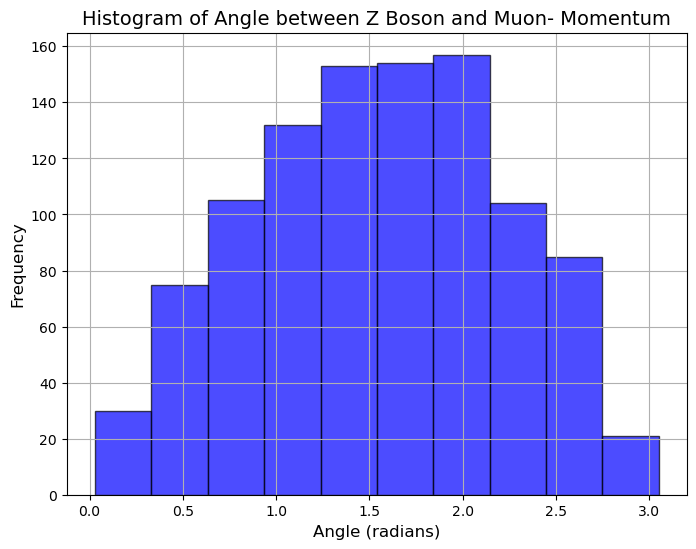

In [19]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZProp)_muonminus_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and Muon- Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()